<a href="https://colab.research.google.com/github/matheusfsanna/dados_f1/blob/main/f1_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção
Tratando os dados do arquivo pilotos para obter nome_completo e idade


In [47]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [17]:
pilotos = pd.read_csv('drivers.csv')

In [18]:
pilotos.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [19]:
def calcular_idade(data_nascimento):
    hoje = datetime.date.today()
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

In [20]:
# Certifique-se que a coluna 'dob' está no formato de data
pilotos['dob'] = pd.to_datetime(pilotos['dob'])

# Calcula a idade e cria uma nova coluna
pilotos['idade'] = pilotos['dob'].apply(calcular_idade)

In [21]:
pilotos

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,idade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,39
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,47
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,39
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,43
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,42
...,...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,29
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,23
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant,23
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson,22


In [22]:
pilotos = pilotos[['driverId', 'driverRef', 'forename', 'surname', 'idade']]

In [23]:
# 1. Crie a coluna 'nome_completo' concatenando 'forename' e 'surname'
pilotos['nome_completo'] = pilotos['forename'] + ' ' + pilotos['surname']

# 2. Exclua as colunas 'forename' e 'surname'
pilotos = pilotos.drop(['forename', 'surname'], axis=1)

# 3. Exiba o DataFrame 'pilotos' com a nova coluna 'nome_completo'
pilotos

<ipython-input-23-348011630ccd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilotos['nome_completo'] = pilotos['forename'] + ' ' + pilotos['surname']


,driverId,driverRef,idade,nome_completo
0,1,hamilton,39,Lewis Hamilton
1,2,heidfeld,47,Nick Heidfeld
2,3,rosberg,39,Nico Rosberg
3,4,alonso,43,Fernando Alonso
4,5,kovalainen,42,Heikki Kovalainen
...,...,...,...,...
854,856,de_vries,29,Nyck de Vries
855,857,piastri,23,Oscar Piastri
856,858,sargeant,23,Logan Sargeant
857,859,lawson,22,Liam Lawson


In [24]:
pilotos.to_csv('pilotos.csv', index=False)

# Comparando com a classificação

In [25]:
classificacao = pd.read_csv('driver_standings.csv', index_col=0)

In [26]:
classificacao.head()

,raceId,driverId,points,position,positionText,wins
driverStandingsId,,,,,,
1,18,1,10.0,1,1,1
2,18,2,8.0,2,2,0
3,18,3,6.0,3,3,0
4,18,4,5.0,4,4,0
5,18,5,4.0,5,5,0


In [27]:
# 1. Certifique-se que 'driverId' é uma coluna e não o índice do DataFrame 'classificacao'
classificacao = classificacao.reset_index()

# 2. Faça um merge dos DataFrames 'classificacao' e 'pilotos' usando a coluna 'driverId'
classificacao = pd.merge(classificacao, pilotos[['driverId', 'nome_completo']], on='driverId', how='left')

# 3. Exiba o DataFrame 'classificacao' com a nova coluna 'nome_completo'
classificacao

,driverStandingsId,raceId,driverId,points,position,positionText,wins,nome_completo
0,1,18,1,10.0,1,1,1,Lewis Hamilton
1,2,18,2,8.0,2,2,0,Nick Heidfeld
2,3,18,3,6.0,3,3,0,Nico Rosberg
3,4,18,4,5.0,4,4,0,Fernando Alonso
4,5,18,5,4.0,5,5,0,Heikki Kovalainen
...,...,...,...,...,...,...,...,...
34632,72909,1134,839,5.0,17,17,0,Esteban Ocon
34633,72910,1134,848,4.0,18,18,0,Alexander Albon
34634,72911,1134,855,0.0,19,19,0,Guanyu Zhou
34635,72912,1134,858,0.0,20,20,0,Logan Sargeant


In [28]:
classificacao = classificacao[['driverStandingsId', 'raceId', 'driverId', 'points', 'position','wins', 'nome_completo']]

In [29]:
classificacao

,driverStandingsId,raceId,driverId,points,position,wins,nome_completo
0,1,18,1,10.0,1,1,Lewis Hamilton
1,2,18,2,8.0,2,0,Nick Heidfeld
2,3,18,3,6.0,3,0,Nico Rosberg
3,4,18,4,5.0,4,0,Fernando Alonso
4,5,18,5,4.0,5,0,Heikki Kovalainen
...,...,...,...,...,...,...,...
34632,72909,1134,839,5.0,17,0,Esteban Ocon
34633,72910,1134,848,4.0,18,0,Alexander Albon
34634,72911,1134,855,0.0,19,0,Guanyu Zhou
34635,72912,1134,858,0.0,20,0,Logan Sargeant


# Unindo os dados em um dataframe com nome do piloto, posição, etapa, circuito e ano



In [30]:
corridas = pd.read_csv('races.csv')
circuitos = corridas[['raceId', 'year', 'round', 'circuitId', 'name', 'date']]
circuitos

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,2009-03-29
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05
2,3,2009,3,17,Chinese Grand Prix,2009-04-19
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26
4,5,2009,5,4,Spanish Grand Prix,2009-05-10
...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01


In [31]:
# 1. Faça o merge dos DataFrames 'classificacao' e 'circuitos' usando a coluna 'raceId',
# incluindo as colunas 'year' e 'round'
classificacao = pd.merge(classificacao, circuitos[['raceId', 'name', 'year', 'round']], on='raceId', how='left')

# 2. Renomeie a coluna 'name' para 'nome_corrida'
classificacao = classificacao.rename(columns={'name': 'nome_corrida'})

# 3. Exiba o DataFrame 'classificacao' com as novas colunas
classificacao

,driverStandingsId,raceId,driverId,points,position,wins,nome_completo,nome_corrida,year,round
0,1,18,1,10.0,1,1,Lewis Hamilton,Australian Grand Prix,2008,1
1,2,18,2,8.0,2,0,Nick Heidfeld,Australian Grand Prix,2008,1
2,3,18,3,6.0,3,0,Nico Rosberg,Australian Grand Prix,2008,1
3,4,18,4,5.0,4,0,Fernando Alonso,Australian Grand Prix,2008,1
4,5,18,5,4.0,5,0,Heikki Kovalainen,Australian Grand Prix,2008,1
...,...,...,...,...,...,...,...,...,...,...
34632,72909,1134,839,5.0,17,0,Esteban Ocon,Belgian Grand Prix,2024,14
34633,72910,1134,848,4.0,18,0,Alexander Albon,Belgian Grand Prix,2024,14
34634,72911,1134,855,0.0,19,0,Guanyu Zhou,Belgian Grand Prix,2024,14
34635,72912,1134,858,0.0,20,0,Logan Sargeant,Belgian Grand Prix,2024,14


In [32]:
classificacao.to_csv('classificacao.csv', index=False)

# Iniciando análise de dados

In [44]:
classificacao_2024 = classificacao[classificacao['year'] == 2024]
classificacao_2024

,driverStandingsId,raceId,driverId,points,wins,nome_completo,nome_corrida,year,round
position,,,,,,,,,
17,72574,1121,839,0.0,0,Esteban Ocon,Bahrain Grand Prix,2024,1
16,72573,1121,807,0.0,0,Nico Hülkenberg,Bahrain Grand Prix,2024,1
15,72572,1121,848,0.0,0,Alexander Albon,Bahrain Grand Prix,2024,1
14,72571,1121,852,0.0,0,Yuki Tsunoda,Bahrain Grand Prix,2024,1
13,72570,1121,817,0.0,0,Daniel Ricciardo,Bahrain Grand Prix,2024,1
...,...,...,...,...,...,...,...,...,...
17,72909,1134,839,5.0,0,Esteban Ocon,Belgian Grand Prix,2024,14
18,72910,1134,848,4.0,0,Alexander Albon,Belgian Grand Prix,2024,14
19,72911,1134,855,0.0,0,Guanyu Zhou,Belgian Grand Prix,2024,14


In [45]:
classificacao_2024.to_csv('classificacao_2024.csv', index=False)

In [46]:
# Filtra o DataFrame para a rodada 14
round_14 = classificacao_2024[classificacao_2024['round'] == 14]

# Seleciona as colunas 'nome_completo' e 'points'
pontos_round_14 = round_14[['nome_completo', 'points']]

# Exibe o resultado
print(pontos_round_14)

             nome_completo  points
position                          
1           Max Verstappen   277.0
2             Lando Norris   199.0
3          Charles Leclerc   177.0
4            Oscar Piastri   167.0
5             Carlos Sainz   162.0
6           Lewis Hamilton   150.0
7             Sergio Pérez   131.0
8           George Russell   116.0
9          Fernando Alonso    49.0
10            Lance Stroll    24.0
11         Nico Hülkenberg    22.0
12            Yuki Tsunoda    22.0
13        Daniel Ricciardo    12.0
14          Oliver Bearman     6.0
15            Pierre Gasly     6.0
16         Kevin Magnussen     5.0
17            Esteban Ocon     5.0
18         Alexander Albon     4.0
19             Guanyu Zhou     0.0
20          Logan Sargeant     0.0
21         Valtteri Bottas     0.0


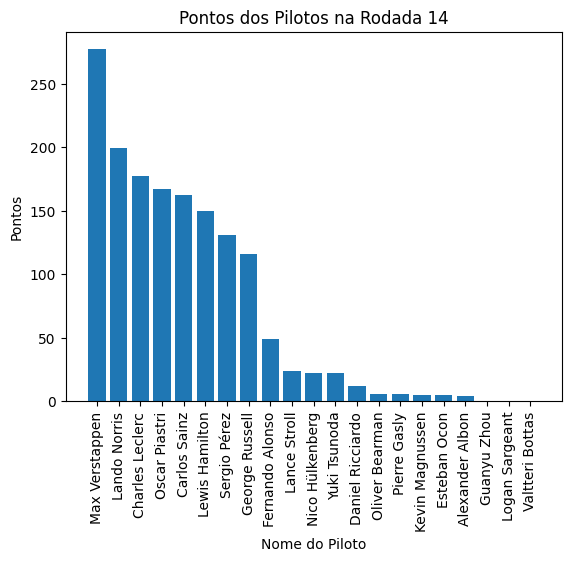

In [48]:
# Cria o gráfico de barras
plt.bar(pontos_round_14['nome_completo'], pontos_round_14['points'])

# Define o título do gráfico
plt.title('Pontos dos Pilotos na Rodada 14')

# Define os rótulos dos eixos
plt.xlabel('Nome do Piloto')
plt.ylabel('Pontos')

# Rotaciona os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Exibe o gráfico
plt.show()

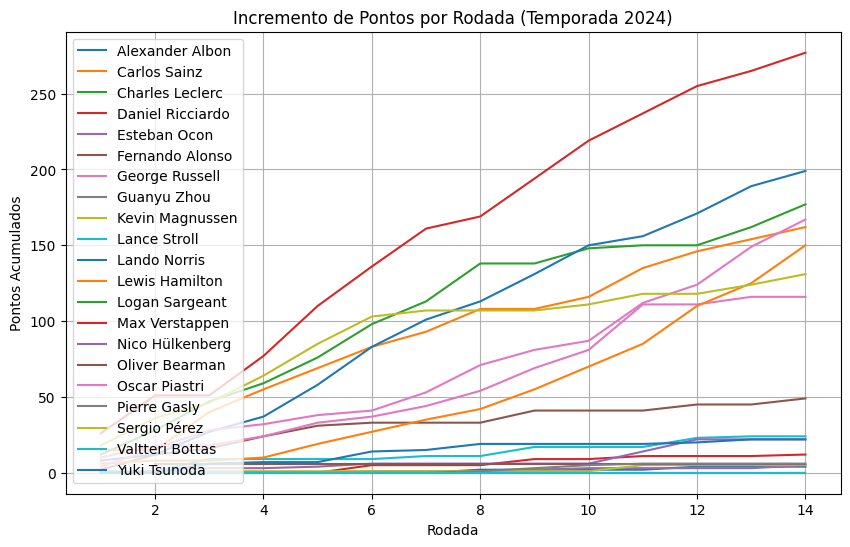

In [50]:
# Filtra o DataFrame para a temporada de 2024
classificacao_2024 = classificacao[classificacao['year'] == 2024]

# Agrupa o DataFrame por 'nome_completo' e 'round', somando os pontos
pontos_por_rodada_2024 = classificacao_2024.groupby(['nome_completo', 'round'])['points'].sum().reset_index()

# Cria o gráfico de linhas
fig, ax = plt.subplots(figsize=(10, 6))

for piloto in pontos_por_rodada_2024['nome_completo'].unique():
    dados_piloto = pontos_por_rodada_2024[pontos_por_rodada_2024['nome_completo'] == piloto]
    ax.plot(dados_piloto['round'], dados_piloto['points'], label=piloto)

ax.set_xlabel('Rodada')
ax.set_ylabel('Pontos Acumulados')
ax.set_title('Incremento de Pontos por Rodada (Temporada 2024)')
ax.legend()
plt.grid(True)
plt.show()